In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

# Set GD limit
limit = 3

# Set CSV paths
teams_csv = 'data/2025/womens_champ_teams.csv'
scores_csv = 'data/2025/JUNE_womens_champ_results.csv'

In [2]:
teams_df = pd.read_csv(teams_csv)
teams_df

,Club ID,Club
0,175321,BURLINGTON SC WOMEN
1,175332,HAMILTON UNITED WOMEN
2,183405,OAKVILLE SC WOMEN
3,175415,PICKERING FC WOMEN
4,175736,RUSH CANADA ACADEMY WOMEN
5,175350,SCROSOPPI FC WOMEN
6,175404,TECUMSEH UNITED FC WOMEN
7,175409,UNIONVILLE MILLIKEN SC WOMEN
8,183409,WHITBY FC WOMEN


In [3]:
scores_df = pd.read_csv(scores_csv)
season_name = scores_df['Name'].iloc[0]
scores_df

,Match ID,home_result,away_result,Home team,Away team,Name,Match date (EDT)
0,261913436,6,1,175332,175321,League1 Ontario Championship Division (W) 2025,2025-06-25 20:00:00
1,261913449,0,2,175415,183405,League1 Ontario Championship Division (W) 2025,2025-06-01 15:00:00
2,261913452,0,2,175404,183409,League1 Ontario Championship Division (W) 2025,2025-06-01 13:00:00
3,261913453,2,8,175736,175415,League1 Ontario Championship Division (W) 2025,2025-06-07 13:00:00
4,261913454,1,0,175350,183405,League1 Ontario Championship Division (W) 2025,2025-06-08 18:00:00
5,261913455,0,1,175404,175332,League1 Ontario Championship Division (W) 2025,2025-06-08 16:00:00
6,261913456,1,6,175321,175409,League1 Ontario Championship Division (W) 2025,2025-06-08 12:30:00
7,261913457,0,1,183409,175409,League1 Ontario Championship Division (W) 2025,2025-06-12 21:00:00
8,261913458,0,2,175321,175404,League1 Ontario Championship Division (W) 2025,2025-06-04 20:30:00
9,261913459,1,0,175332,175350,League1 Ontario Championship Division (W) 2025,2025-06-11 20:00:00


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           BURLINGTON SC WOMEN  HAMILTON UNITED WOMEN  OAKVILLE SC WOMEN  PICKERING FC WOMEN  RUSH CANADA ACADEMY WOMEN  SCROSOPPI FC WOMEN  TECUMSEH UNITED FC WOMEN  UNIONVILLE MILLIKEN SC WOMEN  WHITBY FC WOMEN
261913436                   -1                      1                  0                   0                          0                   0                         0                             0                0
261913449                    0                      0                  1                  -1                          0                   0                         0                             0                0
261913452                    0                      0                  0                   0                          0                   0                        -1                             0                1
261913453                    0                      0                  0                   1                         -1                   0         

In [6]:
print(X_df.T.to_string())

                              261913436  261913449  261913452  261913453  261913454  261913455  261913456  261913457  261913458  261913459  261913460  261913461  261913462  261913463  261913465  261913466  261913467  261913468  261913470  261913471  261913472
BURLINGTON SC WOMEN                  -1          0          0          0          0          0         -1          0         -1          0          0          0         -1          0          0         -1          0          0          0          0          0
HAMILTON UNITED WOMEN                 1          0          0          0          0          1          0          0          0          1          0          0          0          1          0          1          0          0          0          0          0
OAKVILLE SC WOMEN                     0          1          0          0         -1          0          0          0          0          0          1          0          0          0          0          0         -1     

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                              BURLINGTON SC WOMEN  HAMILTON UNITED WOMEN  OAKVILLE SC WOMEN  PICKERING FC WOMEN  RUSH CANADA ACADEMY WOMEN  SCROSOPPI FC WOMEN  TECUMSEH UNITED FC WOMEN  UNIONVILLE MILLIKEN SC WOMEN  WHITBY FC WOMEN
BURLINGTON SC WOMEN                             5                     -2                  0                   0                          0                   0                        -1                            -1               -1
HAMILTON UNITED WOMEN                          -2                      5                  0                   0                          0                  -1                        -1                            -1                0
OAKVILLE SC WOMEN                               0                      0                  5                  -1                         -1                  -1                         0                            -1               -1
PICKERING FC WOMEN                              0                      0

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                              BURLINGTON SC WOMEN  HAMILTON UNITED WOMEN  OAKVILLE SC WOMEN  PICKERING FC WOMEN  RUSH CANADA ACADEMY WOMEN  SCROSOPPI FC WOMEN  TECUMSEH UNITED FC WOMEN  UNIONVILLE MILLIKEN SC WOMEN  WHITBY FC WOMEN
BURLINGTON SC WOMEN                             5                     -2                  0                   0                          0                   0                        -1                            -1               -1
HAMILTON UNITED WOMEN                          -2                      5                  0                   0                          0                  -1                        -1                            -1                0
OAKVILLE SC WOMEN                               0                      0                  5                  -1                         -1                  -1                         0                            -1               -1
PICKERING FC WOMEN                              0                      0

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = pd.DataFrame(p, index=teams, columns=['GD'])
print(p_bar.to_string())

                              GD
BURLINGTON SC WOMEN          -14
HAMILTON UNITED WOMEN         11
OAKVILLE SC WOMEN             -1
PICKERING FC WOMEN             3
RUSH CANADA ACADEMY WOMEN     -6
SCROSOPPI FC WOMEN             4
TECUMSEH UNITED FC WOMEN      -3
UNIONVILLE MILLIKEN SC WOMEN   3
WHITBY FC WOMEN                3


In [10]:
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                              GD
BURLINGTON SC WOMEN          -14
HAMILTON UNITED WOMEN         11
OAKVILLE SC WOMEN             -1
PICKERING FC WOMEN             3
RUSH CANADA ACADEMY WOMEN     -6
SCROSOPPI FC WOMEN             4
TECUMSEH UNITED FC WOMEN      -3
UNIONVILLE MILLIKEN SC WOMEN   3
WHITBY FC WOMEN                0


In [11]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                              GD with limited blowouts
BURLINGTON SC WOMEN                                -10
HAMILTON UNITED WOMEN                                9
OAKVILLE SC WOMEN                                   -1
PICKERING FC WOMEN                                   0
RUSH CANADA ACADEMY WOMEN                           -3
SCROSOPPI FC WOMEN                                   4
TECUMSEH UNITED FC WOMEN                            -3
UNIONVILLE MILLIKEN SC WOMEN                         1
WHITBY FC WOMEN                                      0


In [12]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                              massey_rating
HAMILTON UNITED WOMEN              1.534478
SCROSOPPI FC WOMEN                 1.240801
UNIONVILLE MILLIKEN SC WOMEN       0.636118
PICKERING FC WOMEN                 0.579912
WHITBY FC WOMEN                    0.175228
OAKVILLE SC WOMEN                  0.080146
TECUMSEH UNITED FC WOMEN          -0.826177
RUSH CANADA ACADEMY WOMEN         -1.231330
BURLINGTON SC WOMEN               -2.189175


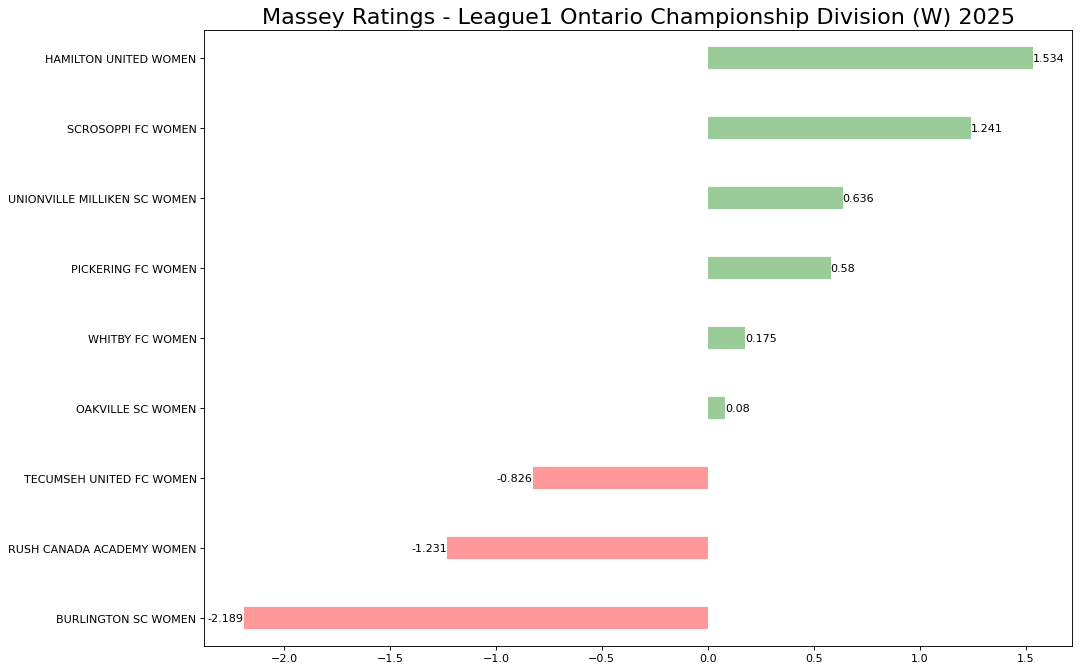

In [13]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [14]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                              massey_rating
HAMILTON UNITED WOMEN              1.314945
SCROSOPPI FC WOMEN                 1.164906
WHITBY FC WOMEN                    0.233212
UNIONVILLE MILLIKEN SC WOMEN       0.200737
PICKERING FC WOMEN                -0.002619
OAKVILLE SC WOMEN                 -0.009411
RUSH CANADA ACADEMY WOMEN         -0.643291
TECUMSEH UNITED FC WOMEN          -0.726039
BURLINGTON SC WOMEN               -1.532440


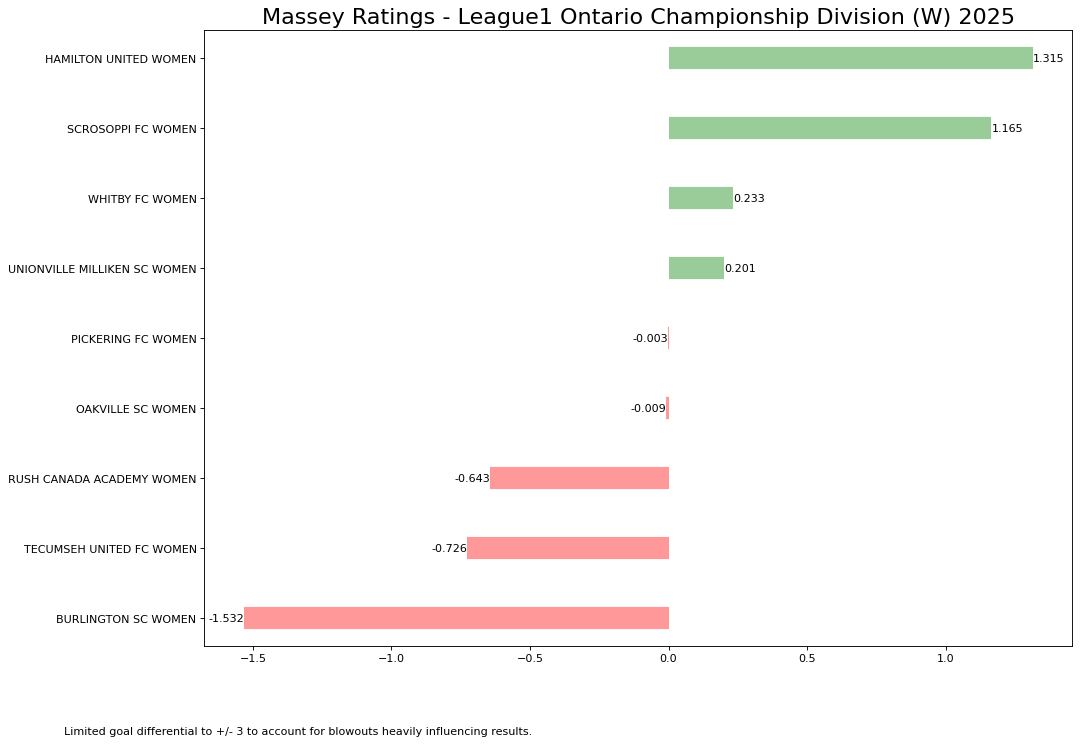

In [15]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})
plt.figtext(s=f'Limited goal differential to +/- {str(limit)} to account for blowouts heavily influencing results.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()